In [1]:
import pandas as pd

df = pd.read_csv('data/산재병원.csv', encoding='utf-8-sig')

In [2]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=SRaKw_TGwHo,따끈한곰탕,1년 전,근로복지공단 은. 근로자을. 위한공단이아니다. 필요없은 집단이다
1,1,https://www.youtube.com//watch?v=SRaKw_TGwHo,강마루,1년 전,좋은정보 감사합니다
2,2,https://www.youtube.com//watch?v=SRaKw_TGwHo,cloud cloud,11개월 전,중요한정보감사합니다
3,3,https://www.youtube.com//watch?v=SRaKw_TGwHo,박장대소,11개월 전,참 진짜염병들하고계시네
4,4,https://www.youtube.com//watch?v=SRaKw_TGwHo,파워고릴라,1년 전,근로사기공단입니다 10미터에서추락핵 늑골8대가부러졌는데도4개월만에종료 되었다고 통보...
...,...,...,...,...,...
1114,1114,https://www.youtube.com//watch?v=HOud00o_UHo,강은미,1개월 전,아 유연석 ㅈㄴ게 잘생겼넹 ㅋㅋㅋ
1115,1115,https://www.youtube.com//watch?v=HOud00o_UHo,Joy소영,1개월 전,이시국에 보니까 환자들 마스크 않쓰고 오는거 보니까 답--답
1116,1116,https://www.youtube.com//watch?v=HOud00o_UHo,조민성,1개월 전,저렇게 기침이 계속 나오면 병원에 당연히 마스크를 끼고 나와야지;; ㅈㄴ 생각없어ㅠㅠ
1117,1117,https://www.youtube.com//watch?v=HOud00o_UHo,살구,1개월 전,이거 기침소리 불안해서마스크 쓰고 봤어요ㅠㅠ


In [4]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'회사': 151,
 '병원': 145,
 '산재': 135,
 '산재처리': 75,
 '의사': 75,
 '안녕': 56,
 '수술': 54,
 '마스크': 54,
 '신청': 53,
 '정도': 52,
 '영상': 50,
 '지금': 44,
 '허리': 41,
 '정보': 40,
 '나경원': 39,
 '아버지': 37,
 '상황': 37,
 '코로나': 37,
 '선생': 36,
 '입원': 35,
 '시간': 33,
 '상태': 32,
 '보상': 32,
 '산재신청': 31,
 '치료': 31,
 '통증': 31,
 '환자': 31,
 '이상': 30,
 '대학병원': 29,
 '골절': 28,
 '손가락': 27,
 '가정폭력': 27,
 '문제': 26,
 '부탁': 26,
 '휴업급여': 25,
 '노무사': 25,
 '부분': 25,
 '처음': 25,
 '승인': 24,
 '시국': 24,
 '찍자': 24,
 '근로복지공단': 23,
 '사고': 23,
 '처리': 23,
 '도움': 22,
 '업무': 22,
 '남편': 22,
 '이제': 21,
 '작년': 21,
 '본인': 21}

In [5]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'회사': 151,
 '병원': 145,
 '산재': 135,
 '산재처리': 75,
 '의사': 75,
 '안녕': 56,
 '수술': 54,
 '마스크': 54,
 '신청': 53,
 '정도': 52,
 '영상': 50,
 '지금': 44,
 '허리': 41,
 '정보': 40,
 '나경원': 39,
 '아버지': 37,
 '상황': 37,
 '코로나': 37,
 '선생': 36,
 '입원': 35,
 '시간': 33,
 '상태': 32,
 '보상': 32,
 '산재신청': 31,
 '치료': 31,
 '통증': 31,
 '환자': 31,
 '이상': 30,
 '대학병원': 29,
 '골절': 28}

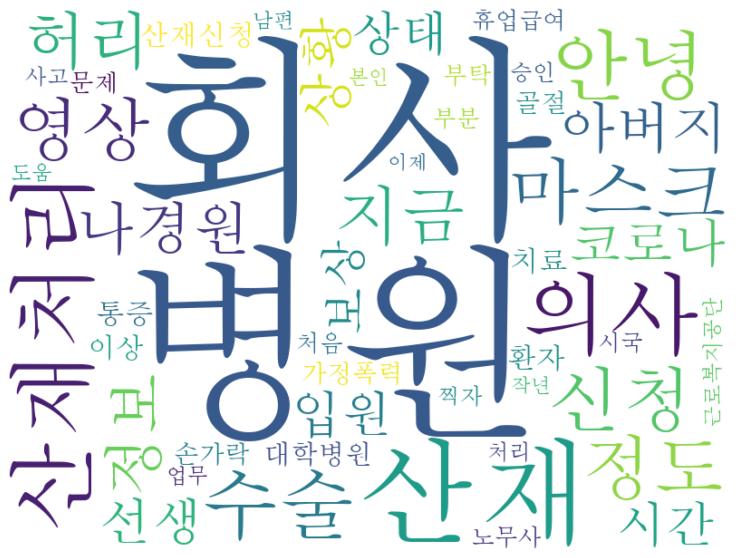

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

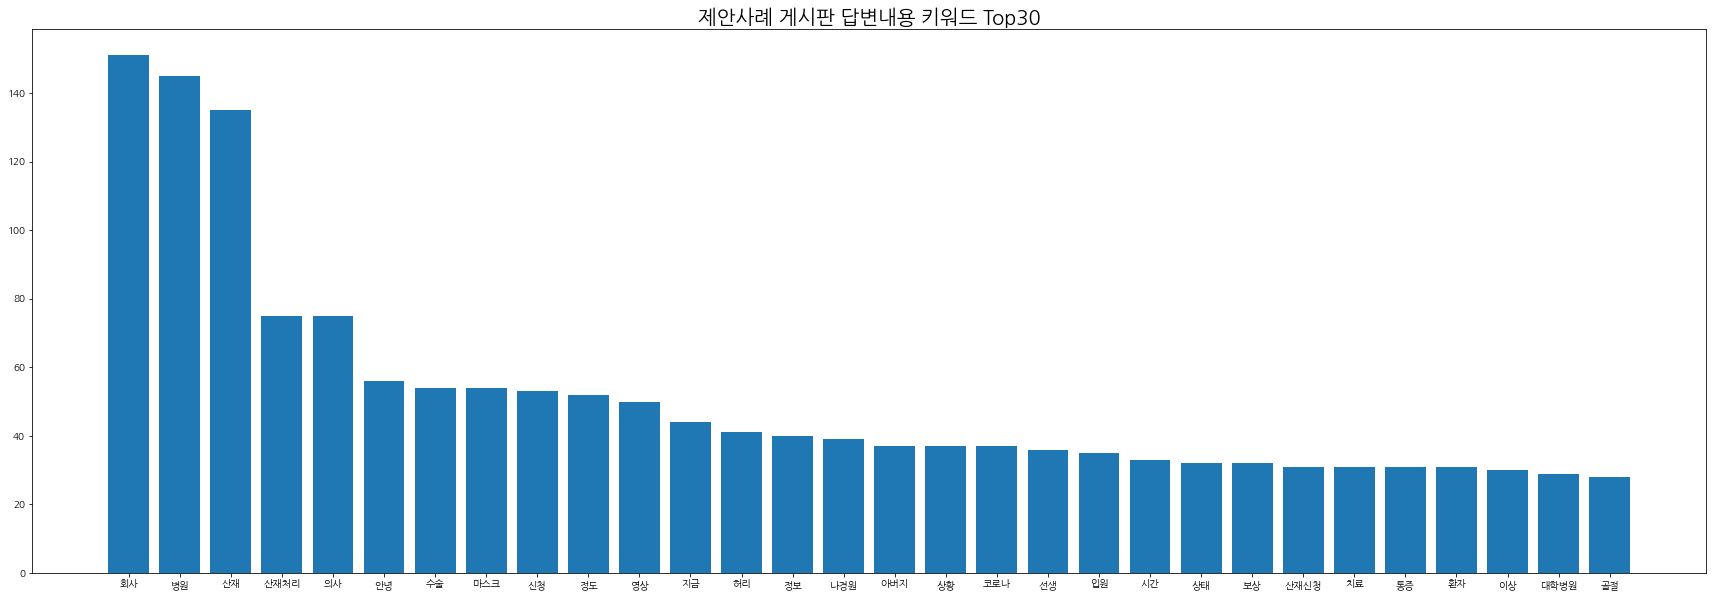

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [8]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'회사': 0,
 '병원': 1,
 '산재': 2,
 '산재처리': 3,
 '의사': 4,
 '안녕': 5,
 '수술': 6,
 '마스크': 7,
 '신청': 8,
 '정도': 9,
 '영상': 10,
 '지금': 11,
 '허리': 12,
 '정보': 13,
 '나경원': 14,
 '아버지': 15,
 '상황': 16,
 '코로나': 17,
 '선생': 18,
 '입원': 19,
 '시간': 20,
 '상태': 21,
 '보상': 22,
 '산재신청': 23,
 '치료': 24,
 '통증': 25,
 '환자': 26,
 '이상': 27,
 '대학병원': 28,
 '골절': 29,
 '손가락': 30,
 '가정폭력': 31,
 '문제': 32,
 '부탁': 33,
 '휴업급여': 34,
 '노무사': 35,
 '부분': 36,
 '처음': 37,
 '승인': 38,
 '시국': 39,
 '찍자': 40,
 '근로복지공단': 41,
 '사고': 42,
 '처리': 43,
 '도움': 44,
 '업무': 45,
 '남편': 46,
 '이제': 47,
 '작년': 48,
 '본인': 49}

In [9]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '병원': 1,
 '산재': 2,
 '산재처리': 3,
 '의사': 4,
 '안녕': 5,
 '수술': 6,
 '마스크': 7,
 '신청': 8,
 '정도': 9,
 '영상': 10,
 '지금': 11,
 '허리': 12,
 '정보': 13,
 '나경원': 14,
 '아버지': 15,
 '상황': 16,
 '코로나': 17,
 '선생': 18,
 '입원': 19,
 '시간': 20,
 '상태': 21,
 '보상': 22,
 '산재신청': 23,
 '치료': 24,
 '통증': 25,
 '환자': 26,
 '이상': 27,
 '대학병원': 28,
 '골절': 29}

In [10]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '병원': 1,
 '산재': 2,
 '산재처리': 3,
 '의사': 4,
 '안녕': 5,
 '수술': 6,
 '마스크': 7,
 '신청': 8,
 '정도': 9,
 '영상': 10,
 '지금': 11,
 '허리': 12,
 '정보': 13,
 '나경원': 14,
 '아버지': 15,
 '상황': 16,
 '코로나': 17,
 '선생': 18,
 '입원': 19,
 '시간': 20,
 '상태': 21,
 '보상': 22,
 '산재신청': 23,
 '치료': 24,
 '통증': 25,
 '환자': 26,
 '이상': 27,
 '대학병원': 28,
 '골절': 29}

In [11]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '회사',
 1: '병원',
 2: '산재',
 3: '산재처리',
 4: '의사',
 5: '안녕',
 6: '수술',
 7: '마스크',
 8: '신청',
 9: '정도',
 10: '영상',
 11: '지금',
 12: '허리',
 13: '정보',
 14: '나경원',
 15: '아버지',
 16: '상황',
 17: '코로나',
 18: '선생',
 19: '입원',
 20: '시간',
 21: '상태',
 22: '보상',
 23: '산재신청',
 24: '치료',
 25: '통증',
 26: '환자',
 27: '이상',
 28: '대학병원',
 29: '골절',
 30: '손가락',
 31: '가정폭력',
 32: '문제',
 33: '부탁',
 34: '휴업급여',
 35: '노무사',
 36: '부분',
 37: '처음',
 38: '승인',
 39: '시국',
 40: '찍자',
 41: '근로복지공단',
 42: '사고',
 43: '처리',
 44: '도움',
 45: '업무',
 46: '남편',
 47: '이제',
 48: '작년',
 49: '본인'}

In [12]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '회사',
 1: '병원',
 2: '산재',
 3: '산재처리',
 4: '의사',
 5: '안녕',
 6: '수술',
 7: '마스크',
 8: '신청',
 9: '정도',
 10: '영상',
 11: '지금',
 12: '허리',
 13: '정보',
 14: '나경원',
 15: '아버지',
 16: '상황',
 17: '코로나',
 18: '선생',
 19: '입원',
 20: '시간',
 21: '상태',
 22: '보상',
 23: '산재신청',
 24: '치료',
 25: '통증',
 26: '환자',
 27: '이상',
 28: '대학병원',
 29: '골절'}

In [13]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0, 13, 31, ...,  1,  3,  1],
       [13,  0, 12, ...,  0,  0,  0],
       [31, 12,  0, ...,  1,  2,  1],
       ...,
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 3,  0,  2, ...,  0,  0,  0],
       [ 1,  0,  1, ...,  0,  0,  0]])

In [14]:
answer_sentences_nouns_result

[['근로복지공단'],
 ['근로자'],
 ['공단'],
 ['필요', '집단'],
 ['은정'],
 ['중요한정'],
 ['진짜염병'],
 ['근로사기공단', '늑골', '대가', '통보', '차후', '병원비', '인부', '도적놈집단'],
 ['아버지', '일용직', '고관절', '철심', '대학병원', '아버지', '혼자', '상태'],
 ['산재신청', '상황'],
 ['도움', '병원치료', '상태', '손톱', '은일'],
 [],
 ['선생', '직장', '산재', '동료', '증언', '진술서', '진단서'],
 ['학교', '동료', '증언', '서기'],
 ['가해자', '나라'],
 ['안녕'],
 ['영상'],
 ['금속가공', '선반', '얼굴', '접촉', '피부염', '산재진행', '대학병원', '첩포검사', '최근'],
 [],
 ['검사항목', '금속', '가지'],
 [],
 ['관련', '산재승인', '가능성'],
 [],
 ['근무', '금속', '절삭유'],
 [],
 [],
 ['승인완료', '이주일정', '휴업급여', '문제'],
 [],
 ['개인적', '상담'],
 ['두개', '승인', '불승인', '재심사', '근로복지', '요양', '승인', '진행을해'],
 [],
 ['병원', '호전'],
 ['안녕'],
 ['노무사', '알바', '전치', '진단'],
 ['알바', '위촉직', '보험설계사'],
 ['산재', '신청', '휴업급여'],
 [],
 ['이영상',
  '내용',
  '일부승인',
  '중간',
  '동안',
  '시술',
  '병원안',
  '요양시작',
  '종결',
  '종결',
  '병원',
  '답합'],
 [],
 [],
 ['질문', '가능한가'],
 ['장애',
  '신청',
  '발목',
  '골절',
  '수술후',
  '요양치료',
  '문리치료',
  '산재기간',
  '수술후',
  '장애',
  '진단',
  '이야기',
  '산재기간',
  '장애',
  '산재치료

In [15]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0, 13, 31, 14,  3,  5,  5,  0, 10,  4,  4,  8,  3,  0,  0,  6,
         5,  0,  0,  9,  0,  2,  3,  7,  6,  5,  0,  4,  1,  0],
       [13,  0, 12, 14, 13,  1,  5,  5,  1,  4,  2,  5,  5,  0,  0,  6,
         5,  2,  1,  9,  4,  0,  0,  4,  8,  5,  4,  5,  4,  4],
       [31, 12,  0,  4,  2,  4,  5,  0, 20,  3,  5,  6,  6,  1,  0,  3,
         5,  0,  3,  6,  1,  3,  8,  3,  8,  1,  1,  1,  0,  5],
       [14, 14,  4,  0,  2,  2,  2,  0,  2,  2,  1,  1,  1,  0,  0,  4,
         0,  0,  1,  2,  0,  4,  0,  1,  1,  0,  0,  1,  1,  5],
       [ 3, 13,  2,  2,  0,  0,  5,  3,  1,  1,  1,  4,  0,  0,  0,  2,
         0,  1,  0,  3,  0,  0,  0,  0,  0,  3, 11,  0,  1,  0],
       [ 5,  1,  4,  2,  0,  0,  5,  0,  2,  1,  5,  1,  2,  4,  0,  1,
         0,  0,  3,  1,  0,  3,  2,  1,  1,  0,  0,  0,  0,  0],
       [ 5,  5,  5,  2,  5,  5,  0,  0,  5,  4,  0,  2,  4,  1,  0,  2,
         1,  0,  1,  0,  0,  1,  2,  4,  2,  3,  1,  2,  2,  4],
       [ 0,  5,  0,  0,  3,  0,  0,  0,  

In [16]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [17]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 13},
   2: {'weight': 31},
   3: {'weight': 14},
   4: {'weight': 3},
   5: {'weight': 5},
   6: {'weight': 5},
   8: {'weight': 10},
   9: {'weight': 4},
   10: {'weight': 4},
   11: {'weight': 8},
   12: {'weight': 3},
   15: {'weight': 6},
   16: {'weight': 5},
   19: {'weight': 9},
   21: {'weight': 2},
   22: {'weight': 3},
   23: {'weight': 7},
   24: {'weight': 6},
   25: {'weight': 5},
   27: {'weight': 4},
   28: {'weight': 1}}),
 (1,
  {0: {'weight': 13},
   2: {'weight': 12},
   3: {'weight': 14},
   4: {'weight': 13},
   5: {'weight': 1},
   6: {'weight': 5},
   7: {'weight': 5},
   8: {'weight': 1},
   9: {'weight': 4},
   10: {'weight': 2},
   11: {'weight': 5},
   12: {'weight': 5},
   15: {'weight': 6},
   16: {'weight': 5},
   17: {'weight': 2},
   18: {'weight': 1},
   19: {'weight': 9},
   20: {'weight': 4},
   23: {'weight': 4},
   24: {'weight': 8},
   25: {'weight': 5},
   26: {'weight': 4},
   27: {'weight': 5},
   28: {'weight': 4},
   29: 

In [18]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 13},
   2: {'weight': 31},
   3: {'weight': 14},
   4: {'weight': 3},
   5: {'weight': 5},
   6: {'weight': 5},
   8: {'weight': 10},
   9: {'weight': 4},
   10: {'weight': 4},
   11: {'weight': 8},
   12: {'weight': 3},
   15: {'weight': 6},
   16: {'weight': 5},
   19: {'weight': 9},
   21: {'weight': 2},
   22: {'weight': 3},
   23: {'weight': 7},
   24: {'weight': 6},
   25: {'weight': 5},
   27: {'weight': 4},
   28: {'weight': 1},
   30: {'weight': 4},
   32: {'weight': 4},
   33: {'weight': 2},
   34: {'weight': 5},
   35: {'weight': 3},
   36: {'weight': 5},
   37: {'weight': 4},
   38: {'weight': 8},
   41: {'weight': 4},
   42: {'weight': 5},
   43: {'weight': 10},
   44: {'weight': 2},
   45: {'weight': 3},
   46: {'weight': 1},
   47: {'weight': 1},
   48: {'weight': 3},
   49: {'weight': 1}}),
 (1,
  {0: {'weight': 13},
   2: {'weight': 12},
   3: {'weight': 14},
   4: {'weight': 13},
   5: {'weight': 1},
   6: {'weight': 5},
   7: {'weight': 5},
   8

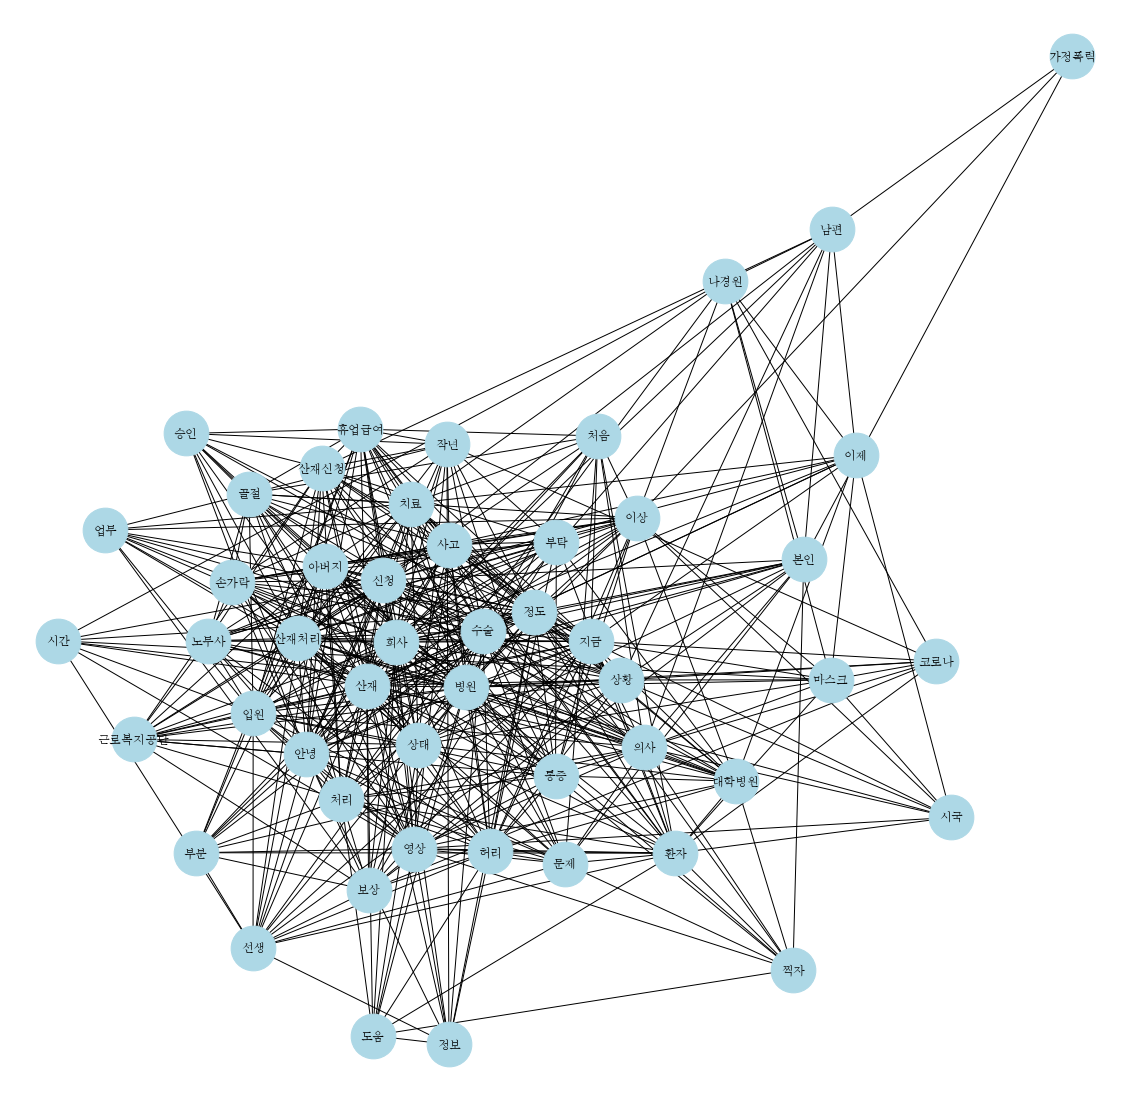

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

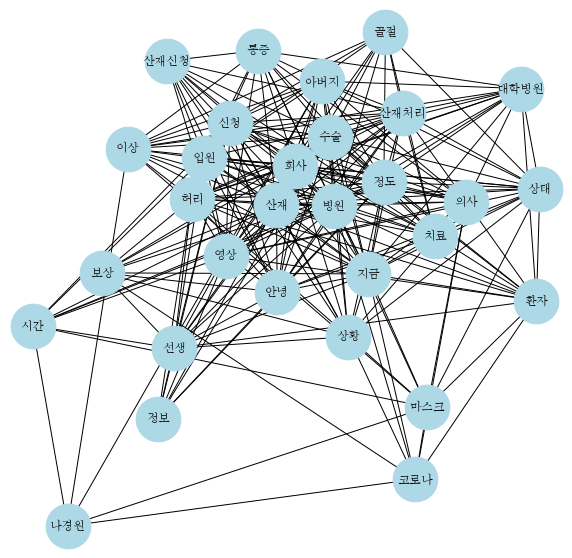

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [21]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.4260869565217391,
 1: 0.49,
 2: 0.5212765957446809,
 3: 0.5268817204301075,
 4: 0.49,
 5: 0.5104166666666666,
 6: 0.5,
 7: 0.4336283185840708,
 8: 0.5697674418604651,
 9: 0.5051546391752577,
 10: 0.5268817204301075,
 11: 0.5568181818181818,
 12: 0.550561797752809,
 13: 0.47572815533980584,
 14: 0.5,
 15: 0.5384615384615384,
 16: 0.5384615384615384,
 17: 0.4224137931034483,
 18: 0.5632183908045977,
 19: 0.5,
 20: 0.46226415094339623,
 21: 0.5632183908045977,
 22: 0.5,
 23: 0.532608695652174,
 24: 0.5212765957446809,
 25: 0.5212765957446809,
 26: 0.5632183908045977,
 27: 0.5384615384615384,
 28: 0.550561797752809,
 29: 0.4537037037037037,
 30: 0.5212765957446809,
 31: 0.392,
 32: 0.4260869565217391,
 33: 0.47572815533980584,
 34: 0.49,
 35: 0.45794392523364486,
 36: 0.4375,
 37: 0.47572815533980584,
 38: 0.47572815533980584,
 39: 0.46226415094339623,
 40: 0.47572815533980584,
 41: 0.5,
 42: 0.47572815533980584,
 43: 0.5212765957446809,
 44: 0.3983739837398374,
 45: 0.44545454545454

In [22]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.3670886075949367,
 1: 0.453125,
 2: 0.47540983606557374,
 3: 0.5686274509803921,
 4: 0.5087719298245614,
 5: 0.5087719298245614,
 6: 0.4915254237288136,
 7: 0.46774193548387094,
 8: 0.5686274509803921,
 9: 0.5370370370370371,
 10: 0.5471698113207547,
 11: 0.5576923076923077,
 12: 0.58,
 13: 0.5,
 14: 0.4603174603174603,
 15: 0.5576923076923077,
 16: 0.5272727272727272,
 17: 0.4264705882352941,
 18: 0.6170212765957447,
 19: 0.5272727272727272,
 20: 0.5272727272727272,
 21: 0.6041666666666666,
 22: 0.47540983606557374,
 23: 0.5087719298245614,
 24: 0.5178571428571429,
 25: 0.47540983606557374,
 26: 0.5576923076923077,
 27: 0.5370370370370371,
 28: 0.5686274509803921,
 29: 0.4603174603174603}

# 연결중심성

In [23]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.7755102040816326,
 1: 0.7959183673469387,
 2: 0.8163265306122448,
 3: 0.6122448979591836,
 4: 0.4897959183673469,
 5: 0.5918367346938775,
 6: 0.6938775510204082,
 7: 0.24489795918367346,
 8: 0.5510204081632653,
 9: 0.5714285714285714,
 10: 0.5306122448979591,
 11: 0.6326530612244897,
 12: 0.4897959183673469,
 13: 0.2040816326530612,
 14: 0.18367346938775508,
 15: 0.5102040816326531,
 16: 0.42857142857142855,
 17: 0.18367346938775508,
 18: 0.3469387755102041,
 19: 0.5102040816326531,
 20: 0.18367346938775508,
 21: 0.4897959183673469,
 22: 0.32653061224489793,
 23: 0.42857142857142855,
 24: 0.42857142857142855,
 25: 0.4081632653061224,
 26: 0.4693877551020408,
 27: 0.44897959183673464,
 28: 0.3877551020408163,
 29: 0.36734693877551017,
 30: 0.4081632653061224,
 31: 0.061224489795918366,
 32: 0.3469387755102041,
 33: 0.3061224489795918,
 34: 0.42857142857142855,
 35: 0.3877551020408163,
 36: 0.26530612244897955,
 37: 0.26530612244897955,
 38: 0.24489795918367346,
 39: 0.183673469387

In [24]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.7241379310344828,
 1: 0.8620689655172413,
 2: 0.8620689655172413,
 3: 0.6896551724137931,
 4: 0.5517241379310345,
 5: 0.6206896551724138,
 6: 0.7931034482758621,
 7: 0.3448275862068966,
 8: 0.6206896551724138,
 9: 0.7586206896551724,
 10: 0.5862068965517241,
 11: 0.7931034482758621,
 12: 0.6206896551724138,
 13: 0.27586206896551724,
 14: 0.1724137931034483,
 15: 0.5862068965517241,
 16: 0.5172413793103449,
 17: 0.27586206896551724,
 18: 0.5172413793103449,
 19: 0.5862068965517241,
 20: 0.3103448275862069,
 21: 0.5862068965517241,
 22: 0.3448275862068966,
 23: 0.41379310344827586,
 24: 0.5172413793103449,
 25: 0.48275862068965514,
 26: 0.48275862068965514,
 27: 0.5172413793103449,
 28: 0.48275862068965514,
 29: 0.3793103448275862}

# 위세중심성

In [25]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.4528799055400509,
 1: 0.32668394222906616,
 2: 0.4402067084808099,
 3: 0.22737769438607455,
 4: 0.1338943258265098,
 5: 0.12410306816465323,
 6: 0.1764193956245244,
 7: 0.03979221598705423,
 8: 0.22087185064114118,
 9: 0.12413275516379263,
 10: 0.10122956852549636,
 11: 0.15886968355419612,
 12: 0.12272794673064161,
 13: 0.02576543084491659,
 14: 0.006468078382328068,
 15: 0.11819842842859739,
 16: 0.10024396673070063,
 17: 0.024515529850021006,
 18: 0.04360200914791259,
 19: 0.16219331735920772,
 20: 0.02976684254593363,
 21: 0.07161687893425502,
 22: 0.08269031859000615,
 23: 0.10876867313504358,
 24: 0.1493706773869508,
 25: 0.09413437604267759,
 26: 0.061953920547513475,
 27: 0.08038953490595642,
 28: 0.046919950368449245,
 29: 0.10483594200743701,
 30: 0.09193677428642125,
 31: 0.0020478789619477068,
 32: 0.06882532067950056,
 33: 0.04921482705171708,
 34: 0.09190032108967457,
 35: 0.10908909224867963,
 36: 0.07475324082412191,
 37: 0.06848058190791759,
 38: 0.09430762674584

In [26]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.47170274878457324,
 1: 0.36739302160136933,
 2: 0.4613640947122756,
 3: 0.23536172080523876,
 4: 0.15590699731203303,
 5: 0.1155839696532474,
 6: 0.17910576385678534,
 7: 0.04947518077857016,
 8: 0.2398279122072734,
 9: 0.14297938892853565,
 10: 0.1018999684326453,
 11: 0.18385316812694033,
 12: 0.1292628838680936,
 13: 0.02870420478342792,
 14: 0.0044891864037969395,
 15: 0.13010008629995207,
 16: 0.12116092376021391,
 17: 0.031560298590608174,
 18: 0.050683677124556986,
 19: 0.181726809130948,
 20: 0.03805694817461856,
 21: 0.07093514704174782,
 22: 0.08629176573036067,
 23: 0.1092224923230604,
 24: 0.17292243734467594,
 25: 0.11005988818296557,
 26: 0.06769925958782447,
 27: 0.09097382090501396,
 28: 0.053198655323482086,
 29: 0.10304445510783483}

# 근접중심성

In [27]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.2191099601269748,
 1: 0.22080795394677605,
 2: 0.2223222194094019,
 3: 0.20274933770589978,
 4: 0.18734552690398548,
 5: 0.20025390572911997,
 6: 0.21191227284128325,
 7: 0.13284311978678992,
 8: 0.19599660007685205,
 9: 0.19853443102106094,
 10: 0.19281388509532643,
 11: 0.20547545008328824,
 12: 0.1870479084992415,
 13: 0.12067086278687708,
 14: 0.1114247230157825,
 15: 0.1901538421764844,
 16: 0.17723868792192363,
 17: 0.11265085595547068,
 18: 0.16101438211978128,
 19: 0.18987311409552166,
 20: 0.11309546356183559,
 21: 0.1874252583942902,
 22: 0.1563474007705776,
 23: 0.17705586899466802,
 24: 0.1770943770140263,
 25: 0.17353663519727697,
 26: 0.1837513103484578,
 27: 0.18072102688065847,
 28: 0.16959241086776394,
 29: 0.16516217485011092,
 30: 0.1733219730504521,
 31: 0.048792208106953706,
 32: 0.1611544510825502,
 33: 0.15119342641944916,
 34: 0.17689164747678127,
 35: 0.16937302593404305,
 36: 0.14065479641669515,
 37: 0.1407647279068362,
 38: 0.1346407987412972,
 39: 0.1

In [28]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.28395961772395284,
 1: 0.30488044366799844,
 2: 0.3042472044079312,
 3: 0.2782507678373772,
 4: 0.2529938309756073,
 5: 0.2658558557689022,
 6: 0.2945693875021572,
 7: 0.19492246402205513,
 8: 0.26635743325988365,
 9: 0.290085294566744,
 10: 0.25953079566049564,
 11: 0.29508558865017387,
 12: 0.2661881314150127,
 13: 0.1719122645926074,
 14: 0.1213047432820668,
 15: 0.2601362193395141,
 16: 0.24513816441550965,
 17: 0.16956884424916413,
 18: 0.24497684187254087,
 19: 0.25934782230642905,
 20: 0.18468570277632226,
 21: 0.25992683603003014,
 22: 0.1970537515778414,
 23: 0.21816902522782433,
 24: 0.24443631620295045,
 25: 0.2364565677642758,
 26: 0.23710538183102833,
 27: 0.24520712888552287,
 28: 0.23634932291701416,
 29: 0.2081521033736319}

In [29]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.4260869565217391,
 1: 0.49,
 2: 0.5212765957446809,
 3: 0.5268817204301075,
 4: 0.49,
 5: 0.5104166666666666,
 6: 0.5,
 7: 0.4336283185840708,
 8: 0.5697674418604651,
 9: 0.5051546391752577,
 10: 0.5268817204301075,
 11: 0.5568181818181818,
 12: 0.550561797752809,
 13: 0.47572815533980584,
 14: 0.5,
 15: 0.5384615384615384,
 16: 0.5384615384615384,
 17: 0.4224137931034483,
 18: 0.5632183908045977,
 19: 0.5,
 20: 0.46226415094339623,
 21: 0.5632183908045977,
 22: 0.5,
 23: 0.532608695652174,
 24: 0.5212765957446809,
 25: 0.5212765957446809,
 26: 0.5632183908045977,
 27: 0.5384615384615384,
 28: 0.550561797752809,
 29: 0.4537037037037037,
 30: 0.5212765957446809,
 31: 0.392,
 32: 0.4260869565217391,
 33: 0.47572815533980584,
 34: 0.49,
 35: 0.45794392523364486,
 36: 0.4375,
 37: 0.47572815533980584,
 38: 0.47572815533980584,
 39: 0.46226415094339623,
 40: 0.47572815533980584,
 41: 0.5,
 42: 0.47572815533980584,
 43: 0.5212765957446809,
 44: 0.3983739837398374,
 45: 0.44545454545454

In [30]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.3670886075949367,
 1: 0.453125,
 2: 0.47540983606557374,
 3: 0.5686274509803921,
 4: 0.5087719298245614,
 5: 0.5087719298245614,
 6: 0.4915254237288136,
 7: 0.46774193548387094,
 8: 0.5686274509803921,
 9: 0.5370370370370371,
 10: 0.5471698113207547,
 11: 0.5576923076923077,
 12: 0.58,
 13: 0.5,
 14: 0.4603174603174603,
 15: 0.5576923076923077,
 16: 0.5272727272727272,
 17: 0.4264705882352941,
 18: 0.6170212765957447,
 19: 0.5272727272727272,
 20: 0.5272727272727272,
 21: 0.6041666666666666,
 22: 0.47540983606557374,
 23: 0.5087719298245614,
 24: 0.5178571428571429,
 25: 0.47540983606557374,
 26: 0.5576923076923077,
 27: 0.5370370370370371,
 28: 0.5686274509803921,
 29: 0.4603174603174603}

# 매개중심성

In [31]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.0759165939551759,
 1: 0.08272729396165818,
 2: 0.0796353310372249,
 3: 0.05253380107474987,
 4: 0.05688983756051007,
 5: 0.05267549776408981,
 6: 0.06810036970435962,
 7: 0.03432202641207332,
 8: 0.05868902143386312,
 9: 0.05559775470826868,
 10: 0.05680613729346708,
 11: 0.06504464718728346,
 12: 0.045972877254366606,
 13: 0.020141174643682053,
 14: 0.030755179237342473,
 15: 0.04767688991859726,
 16: 0.05223178111447648,
 17: 0.02367083037500661,
 18: 0.03544992815078774,
 19: 0.047949060902326146,
 20: 0.02183439921475853,
 21: 0.04687918037344027,
 22: 0.0351316299733695,
 23: 0.04049213102303884,
 24: 0.03782360963993709,
 25: 0.037249442626004776,
 26: 0.054898752814441724,
 27: 0.06069098930465131,
 28: 0.03653347047864329,
 29: 0.03265097535114013,
 30: 0.033733608826552,
 31: 0.007855433673547156,
 32: 0.034094153003926146,
 33: 0.02636470861317246,
 34: 0.037580909836216606,
 35: 0.032034954482751565,
 36: 0.02311574139535259,
 37: 0.023043403036221606,
 38: 0.020402630

In [32]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.06810785159168883,
 1: 0.09536193518665181,
 2: 0.08923665965962378,
 3: 0.06380087660268477,
 4: 0.06122524825263276,
 5: 0.06174001618619081,
 6: 0.08073561227196911,
 7: 0.05517236920635042,
 8: 0.0666259665907838,
 9: 0.0803470283357804,
 10: 0.06643425409980609,
 11: 0.08651323818323405,
 12: 0.06404507436053773,
 13: 0.02614289294176091,
 14: 0.029256095052924903,
 15: 0.06493020741544452,
 16: 0.06150019035435569,
 17: 0.04505340166266534,
 18: 0.059231100171862824,
 19: 0.060754477539742835,
 20: 0.04642221265618514,
 21: 0.06030223405616794,
 22: 0.038668090422089095,
 23: 0.03864229127810643,
 24: 0.049051584093538776,
 25: 0.045621802141765956,
 26: 0.05635578947566843,
 27: 0.06507673647268303,
 28: 0.04521576275224657,
 29: 0.03573149407327589}

In [33]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.7321186119690822,
 1: 0.7316984418097656,
 2: 0.7607264607173202,
 3: 0.6144014635300291,
 4: 0.40171039545201975,
 5: 0.5774669718790567,
 6: 0.6612727782863804,
 7: 0.08903699123867323,
 8: 0.4946765355666604,
 9: 0.5420521431723224,
 10: 0.45228955824375117,
 11: 0.5865819336648774,
 12: 0.44970523339615626,
 13: 0.10452872837025702,
 14: 0.0352377738180153,
 15: 0.48285094779038074,
 16: 0.3124637099542002,
 17: 0.05860638724880309,
 18: 0.25918506613518233,
 19: 0.4623563311805815,
 20: 0.07880269746243601,
 21: 0.4420822035903784,
 22: 0.22139578167847276,
 23: 0.377622271128945,
 24: 0.3951725419008847,
 25: 0.355014498634783,
 26: 0.34607526195589206,
 27: 0.3717474254362015,
 28: 0.3212687415833916,
 29: 0.3002411064142924,
 30: 0.3774071922080437,
 31: 0.003904958685683416,
 32: 0.2652768016355167,
 33: 0.22343195308016855,
 34: 0.3912743716495554,
 35: 0.34859647763494356,
 36: 0.18470600304272902,
 37: 0.1908419788330196,
 38: 0.17438046686578576,
 39: 0.0686647171589

In [34]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [35]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [36]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [37]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [38]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.7755102040816326,
 '병원': 0.7959183673469387,
 '산재': 0.8163265306122448,
 '산재처리': 0.6122448979591836,
 '의사': 0.4897959183673469,
 '안녕': 0.5918367346938775,
 '수술': 0.6938775510204082,
 '마스크': 0.24489795918367346,
 '신청': 0.5510204081632653,
 '정도': 0.5714285714285714,
 '영상': 0.5306122448979591,
 '지금': 0.6326530612244897,
 '허리': 0.4897959183673469,
 '정보': 0.2040816326530612,
 '나경원': 0.18367346938775508,
 '아버지': 0.5102040816326531,
 '상황': 0.42857142857142855,
 '코로나': 0.18367346938775508,
 '선생': 0.3469387755102041,
 '입원': 0.5102040816326531,
 '시간': 0.18367346938775508,
 '상태': 0.4897959183673469,
 '보상': 0.32653061224489793,
 '산재신청': 0.42857142857142855,
 '치료': 0.42857142857142855,
 '통증': 0.4081632653061224,
 '환자': 0.4693877551020408,
 '이상': 0.44897959183673464,
 '대학병원': 0.3877551020408163,
 '골절': 0.36734693877551017,
 '손가락': 0.4081632653061224,
 '가정폭력': 0.061224489795918366,
 '문제': 0.3469387755102041,
 '부탁': 0.3061224489795918,
 '휴업급여': 0.42857142857142855,
 '노무사': 0.3877551020408163,

In [39]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.7241379310344828,
 '병원': 0.8620689655172413,
 '산재': 0.8620689655172413,
 '산재처리': 0.6896551724137931,
 '의사': 0.5517241379310345,
 '안녕': 0.6206896551724138,
 '수술': 0.7931034482758621,
 '마스크': 0.3448275862068966,
 '신청': 0.6206896551724138,
 '정도': 0.7586206896551724,
 '영상': 0.5862068965517241,
 '지금': 0.7931034482758621,
 '허리': 0.6206896551724138,
 '정보': 0.27586206896551724,
 '나경원': 0.1724137931034483,
 '아버지': 0.5862068965517241,
 '상황': 0.5172413793103449,
 '코로나': 0.27586206896551724,
 '선생': 0.5172413793103449,
 '입원': 0.5862068965517241,
 '시간': 0.3103448275862069,
 '상태': 0.5862068965517241,
 '보상': 0.3448275862068966,
 '산재신청': 0.41379310344827586,
 '치료': 0.5172413793103449,
 '통증': 0.48275862068965514,
 '환자': 0.48275862068965514,
 '이상': 0.5172413793103449,
 '대학병원': 0.48275862068965514,
 '골절': 0.3793103448275862}

In [40]:
answer_top50_word2id

{'회사': 0,
 '병원': 1,
 '산재': 2,
 '산재처리': 3,
 '의사': 4,
 '안녕': 5,
 '수술': 6,
 '마스크': 7,
 '신청': 8,
 '정도': 9,
 '영상': 10,
 '지금': 11,
 '허리': 12,
 '정보': 13,
 '나경원': 14,
 '아버지': 15,
 '상황': 16,
 '코로나': 17,
 '선생': 18,
 '입원': 19,
 '시간': 20,
 '상태': 21,
 '보상': 22,
 '산재신청': 23,
 '치료': 24,
 '통증': 25,
 '환자': 26,
 '이상': 27,
 '대학병원': 28,
 '골절': 29,
 '손가락': 30,
 '가정폭력': 31,
 '문제': 32,
 '부탁': 33,
 '휴업급여': 34,
 '노무사': 35,
 '부분': 36,
 '처음': 37,
 '승인': 38,
 '시국': 39,
 '찍자': 40,
 '근로복지공단': 41,
 '사고': 42,
 '처리': 43,
 '도움': 44,
 '업무': 45,
 '남편': 46,
 '이제': 47,
 '작년': 48,
 '본인': 49}

In [41]:
print(연결중심성.keys())

dict_keys(['회사', '병원', '산재', '산재처리', '의사', '안녕', '수술', '마스크', '신청', '정도', '영상', '지금', '허리', '정보', '나경원', '아버지', '상황', '코로나', '선생', '입원', '시간', '상태', '보상', '산재신청', '치료', '통증', '환자', '이상', '대학병원', '골절'])
